# Group Work Project 3
### Team: Felista, Alfonso, Subham
### Group Number: 9816

Topics:

* Issue 1: Optimizing Hyperparameters

* Issue 2: Optimizing the Bias-Variance Tradeoff

* Issue 3: Applying Ensemble Learning -- Bagging, Boosting, or Stacking

## Issue 1: Optimizing Hyperparameters

**Optimization methods**

**1. Grid Search:**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
svm_model = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the data
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set with best model
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test_scaled, y_test)
print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")

Best parameters found: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.8714
Test set accuracy with best parameters: 0.7333



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.78      0.74      0.76        34

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60


Confusion Matrix on Test Set:


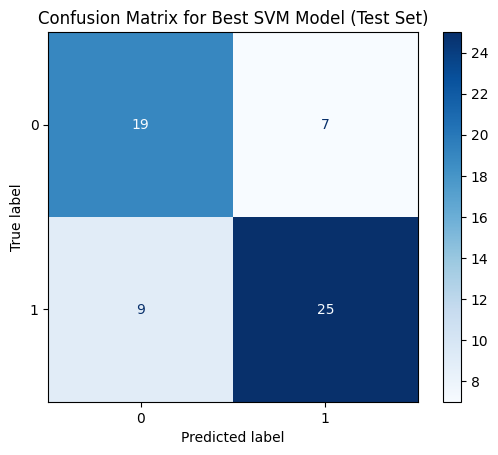

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set using the best model from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test_scaled)


# Classification Report: Provides precision, recall, f1-score, and support for each class
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Confusion Matrix: Visualizes the performance of a classification model
print("\nConfusion Matrix on Test Set:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Best SVM Model (Test Set)")
plt.show() # Display the confusion matrix plot

**2. Random Search:**

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter distribution (for random search)
param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees
    'max_features': ['sqrt', 'log2', None], # Features to consider for best split
    'max_depth': randint(3, 20),       # Maximum depth of tree
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20)   # Minimum number of samples required to be at a leaf node
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit to the data
random_search.fit(X_train_scaled, y_train)

# Print best parameters and best score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_:.4f}")

# Evaluate on test set with best model
best_rf = random_search.best_estimator_
test_accuracy = best_rf.score(X_test_scaled, y_test)
print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")

Best parameters found: {'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 93}
Best cross-validation accuracy: 0.9143
Test set accuracy with best parameters: 0.8500



Classification Report on Test Set (from Random Search):
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.84      0.91      0.87        34

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60


Confusion Matrix on Test Set (from Random Search):


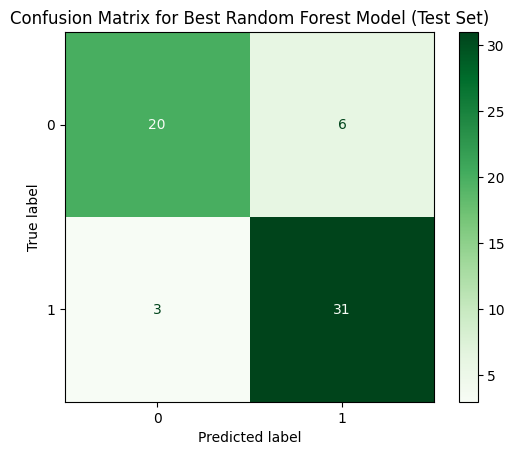

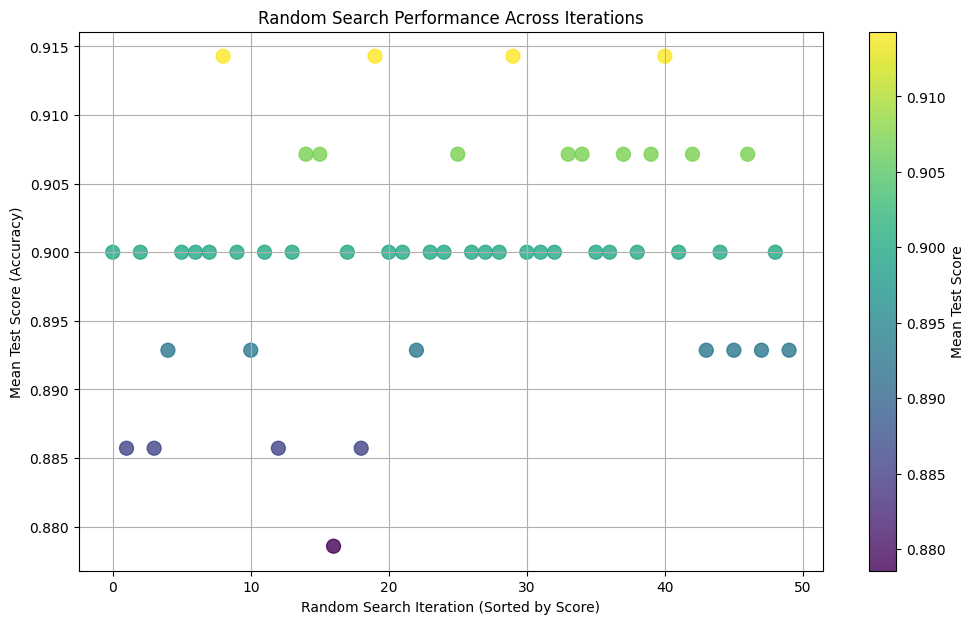

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Make predictions on the test set using the best model from RandomizedSearchCV
y_pred_rf = random_search.best_estimator_.predict(X_test_scaled)

# Classification Report: Provides precision, recall, f1-score, and support for each class
print("\nClassification Report on Test Set (from Random Search):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix: Visualizes the performance of a classification model
print("\nConfusion Matrix on Test Set (from Random Search):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_search.classes_)
disp_rf.plot(cmap=plt.cm.Greens) # Using a different colormap for distinction
plt.title("Confusion Matrix for Best Random Forest Model (Test Set)")
plt.show() # Display the confusion matrix plot

# Plotting Random Search Results: Performance vs. Iteration or Parameter
# This conceptual plot visualizes the cross-validation scores for each iteration of random search.
# It helps understand the search progress and the spread of scores.
results = pd.DataFrame(random_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False) # Sort to see best runs

plt.figure(figsize=(12, 7))
plt.scatter(results.index, results['mean_test_score'], c=results['mean_test_score'], cmap='viridis', s=100, alpha=0.8)
plt.xlabel("Random Search Iteration (Sorted by Score)")
plt.ylabel("Mean Test Score (Accuracy)")
plt.title("Random Search Performance Across Iterations")
plt.colorbar(label="Mean Test Score")
plt.grid(True)
plt.show()

**3. Bayesian Optimization:**

In [23]:
# Bayesian Optimization (Requires additional libraries like 'scikit-optimize' or 'hyperopt')

%pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00


In [24]:
# Bayesian Optimization
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define search space
search_spaces = {
     'C': Real(0.1, 10, 'log-uniform'),
     'kernel': Categorical(['linear', 'rbf']),
     'gamma': Real(1e-4, 1e-1, 'log-uniform'),
 }

# BayesSearchCV setup
opt = BayesSearchCV(
     SVC(),
     search_spaces,
     n_iter=50, # Number of optimization iterations
     cv=5,
     random_state=42,
     n_jobs=-1,
     scoring='accuracy'
 )
opt.fit(X_train_scaled, y_train)
print(f"Best parameters found by Bayesian Optimization: {opt.best_params_}")
print(f"Best cross-validation accuracy: {opt.best_score_:.4f}")

# Evaluate on test set with best model
best_svm_bo = opt.best_estimator_
test_accuracy_bo = best_svm_bo.score(X_test_scaled, y_test)
print(f"Test set accuracy with best parameters (Bayesian Optimization): {test_accuracy_bo:.4f}")

Best parameters found by Bayesian Optimization: OrderedDict([('C', 0.661009829541915), ('gamma', 0.015246748254295629), ('kernel', 'rbf')])
Best cross-validation accuracy: 0.8786
Test set accuracy with best parameters (Bayesian Optimization): 0.7833



Classification Report on Test Set (from Bayesian Optimization):
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.80      0.82      0.81        34

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60


Confusion Matrix on Test Set (from Bayesian Optimization):


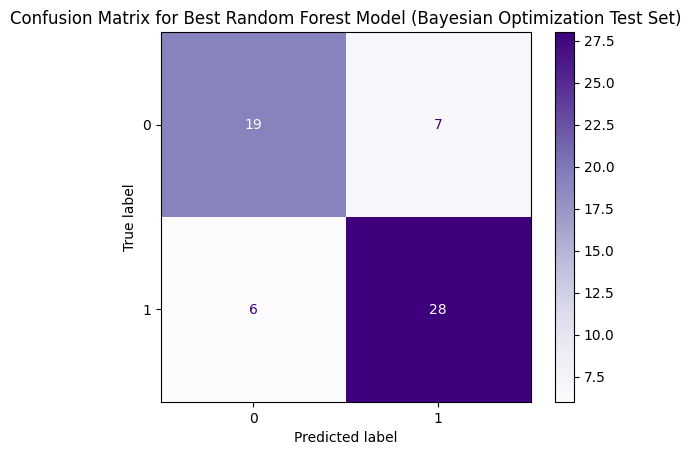

In [28]:
# Make predictions on the test set using the best model from Bayesian Optimization
y_pred_bayes = opt.best_estimator_.predict(X_test_scaled)

# Classification Report
print("\nClassification Report on Test Set (from Bayesian Optimization):")
print(classification_report(y_test, y_pred_bayes))

# Confusion Matrix
print("\nConfusion Matrix on Test Set (from Bayesian Optimization):")
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
disp_bayes = ConfusionMatrixDisplay(confusion_matrix=cm_bayes, display_labels=opt.classes_)
disp_bayes.plot(cmap=plt.cm.Purples) # Different colormap
plt.title("Confusion Matrix for Best Random Forest Model (Bayesian Optimization Test Set)")
plt.show()

# skopt.plots.plot_convergence plot
from skopt.plots import plot_convergence
# plot_convergence(opt) # Corrected to use opt object directly
# plt.title("Bayesian Optimization Convergence Plot")
# plt.show()

### Issue 2: Optimizing the Bias-Variance Tradeoff

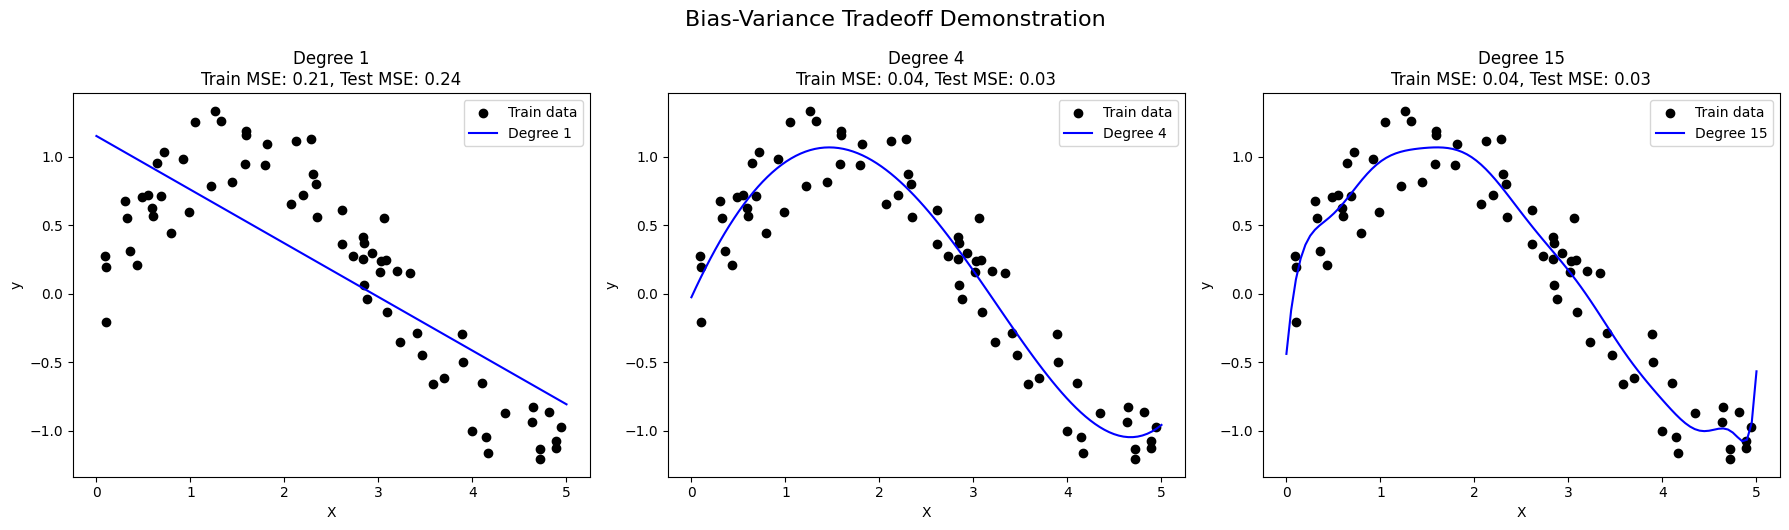

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Step 2: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Fit models of increasing complexity (polynomial degree)
degrees = [1, 4, 15]
train_errors = []
test_errors = []

plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i + 1)

    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Plot the predictions
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.scatter(X_train, y_train, color='black', label='Train data')
    plt.plot(X_plot, y_plot, color='blue', label=f'Degree {degree}')
    plt.title(f"Degree {degree}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.suptitle("Bias-Variance Tradeoff Demonstration", y=1.05, fontsize=16)
plt.show()


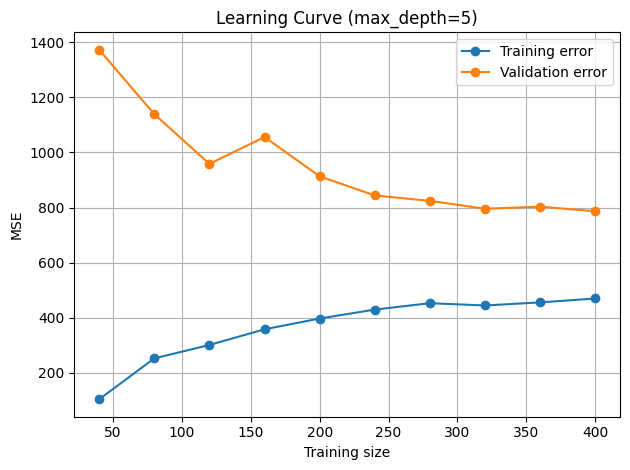

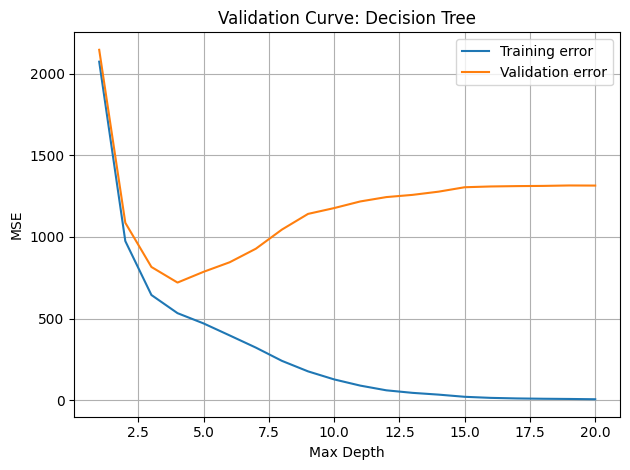

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import train_test_split

# Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=1, noise=25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Learning Curve Plot
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation error')
    plt.title(title)
    plt.xlabel('Training size')
    plt.ylabel('MSE')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()

# 2. Validation Curve Plot for model complexity (max_depth)
def plot_validation_curve(X, y):
    param_range = np.arange(1, 21)
    train_scores, test_scores = validation_curve(
        DecisionTreeRegressor(random_state=42),
        X, y, param_name="max_depth", param_range=param_range,
        scoring="neg_mean_squared_error", cv=5
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(param_range, train_scores_mean, label="Training error")
    plt.plot(param_range, test_scores_mean, label="Validation error")
    plt.title("Validation Curve: Decision Tree")
    plt.xlabel("Max Depth")
    plt.ylabel("MSE")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()

# Generate and display the plots
plot_learning_curve(DecisionTreeRegressor(max_depth=5, random_state=42), X, y, "Learning Curve (max_depth=5)")
plot_validation_curve(X, y)
plt.show()


In [33]:
# Bayesian Optimization
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use synthetic data (same as above)
X, y = make_classification(n_samples=200, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define search space
search_spaces = {
     'C': Real(0.1, 10, 'log-uniform'),
     'kernel': Categorical(['linear', 'rbf']),
     'gamma': Real(1e-4, 1e-1, 'log-uniform'),
 }

# BayesSearchCV setup
opt = BayesSearchCV(
     SVC(),
     search_spaces,
     n_iter=50, # Number of optimization iterations
     cv=5,
     random_state=42,
     n_jobs=-1,
     scoring='accuracy'
 )
opt.fit(X_train_scaled, y_train)
print(f"Best parameters found by Bayesian Optimization: {opt.best_params_}")
print(f"Best cross-validation accuracy: {opt.best_score_:.4f}")

# Evaluate on test set with best model
best_svm_bo = opt.best_estimator_
test_accuracy_bo = best_svm_bo.score(X_test_scaled, y_test)
print(f"Test set accuracy with best parameters (Bayesian Optimization): {test_accuracy_bo:.4f}")

Best parameters found by Bayesian Optimization: OrderedDict([('C', 0.661009829541915), ('gamma', 0.015246748254295629), ('kernel', 'rbf')])
Best cross-validation accuracy: 0.8786
Test set accuracy with best parameters (Bayesian Optimization): 0.7833


# **Applying Ensemble Learning – Bagging, Boosting, or Stacking**

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Example: Stacking ensemble
base_learners = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True))
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression()
)


In [35]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Fetch stock data
data = yf.download('AAPL', start='2021-01-01', end='2023-01-01')
data['Return'] = data['Close'].pct_change()
data['Target'] = (data['Return'].shift(-1) > 0).astype(int)  # Predict next day's direction

# Drop NA rows and build features
data = data.dropna()
X = data[['Return']]
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)


/tmp/ipython-input-35-2376532157.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2021-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


**1. Bagging: Random Forest**

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print(f'Random Forest Accuracy (Bagging): {rf_acc:.2f}')


Random Forest Accuracy (Bagging): 0.46


**2. Boosting: Gradient Boosting Classifier**

In [37]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

gb_acc = accuracy_score(y_test, gb_preds)
print(f'Gradient Boosting Accuracy (Boosting): {gb_acc:.2f}')


Gradient Boosting Accuracy (Boosting): 0.42


**3. Stacking: Combine Models**

In [39]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, kernel='rbf'))
]

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    passthrough=True
)

stack_model.fit(X_train, y_train)
stack_preds = stack_model.predict(X_test)

stack_acc = accuracy_score(y_test, stack_preds)
print(f'Stacking Ensemble Accuracy: {stack_acc:.2f}')


Stacking Ensemble Accuracy: 0.47


**4. Final Comparison Table**

In [40]:
results = {
    'Random Forest (Bagging)': rf_acc,
    'Gradient Boosting': gb_acc,
    'Stacking Ensemble': stack_acc
}

pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy (%)']) * 100


,Accuracy (%)
Random Forest (Bagging),46.357616
Gradient Boosting,41.721854
Stacking Ensemble,47.019868


## Visualizations for Ensemble Learning


**1. Model Accuracy Comparison (Bar Chart)**

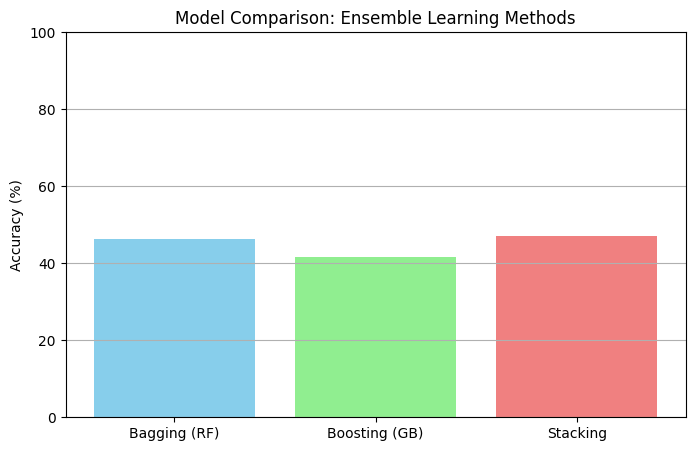

In [41]:
import matplotlib.pyplot as plt

# Accuracy results
results = {
    'Bagging (RF)': rf_acc,
    'Boosting (GB)': gb_acc,
    'Stacking': stack_acc
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [v * 100 for v in results.values()], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison: Ensemble Learning Methods")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


**2. Predicted vs Actual Class (Confusion Matrix)**

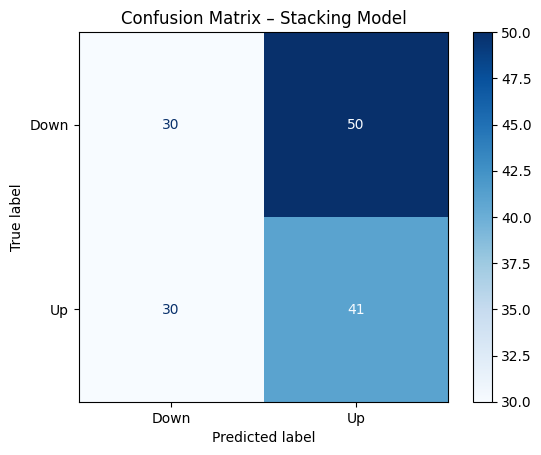

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix for best model (Stacking)
ConfusionMatrixDisplay.from_estimator(stack_model, X_test, y_test, display_labels=['Down', 'Up'], cmap='Blues')
plt.title("Confusion Matrix – Stacking Model")
plt.show()
